### Problem 1:
You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.




#### Data Ingestion: 12 marks


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
%matplotlib inline


In [2]:
data_dict=pd.read_excel("Election_data.xlsx","Sheet1")
data_dict

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


1. Read the dataset. Do the descriptive statistics and do null value condition check. Write an inference on it. (5 Marks)


In [3]:
df=pd.read_excel("Election_data.xlsx","Election_Dataset_Two Classes")

In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [7]:
df.shape

(1525, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) ## Duplicates as serial number removed

Number of duplicate rows = 8


In [12]:
df[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


2. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)


In [13]:
df.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

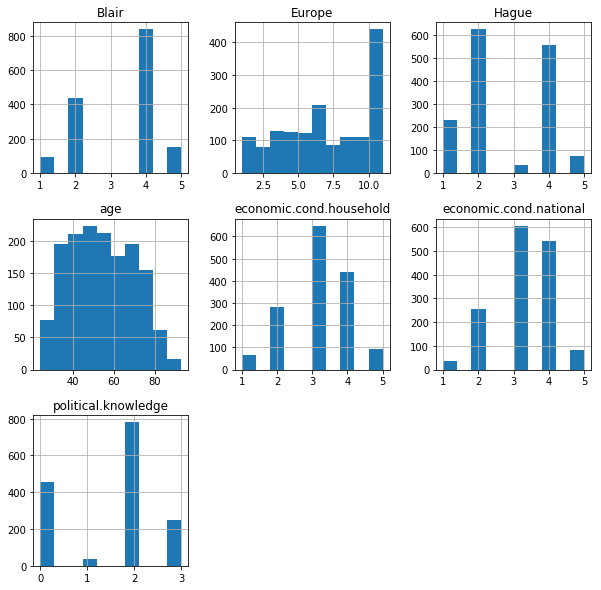

In [14]:
df.hist(figsize=(10,10))
plt.show()


In [15]:
df.groupby(["vote","gender"]).count()

age  economic.cond.national  economic.cond.household  \
vote         gender                                                         
Conservative female  259                     259                      259   
             male    203                     203                      203   
Labour       female  553                     553                      553   
             male    510                     510                      510   

                     Blair  Hague  Europe  political.knowledge  
vote         gender                                             
Conservative female    259    259     259                  259  
             male      203    203     203                  203  
Labour       female    553    553     553                  553  
             male      510    510     510                  510

In [16]:
df.shape

(1525, 9)

In [17]:
a=df['vote'].value_counts().sort_values()
a

Conservative     462
Labour          1063
Name: vote, dtype: int64

In [18]:
Gender=df['gender'].value_counts().sort_values()
Gender

male      713
female    812
Name: gender, dtype: int64

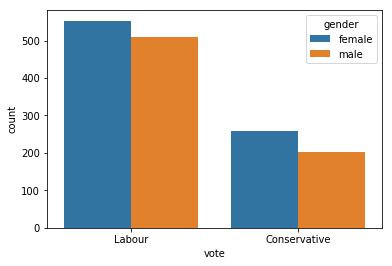

In [19]:
sns.countplot(x="vote",data=df,hue="gender")

In [20]:
df['age_bracket']=pd.cut(df['age'],7,labels =["24-33", "34-43", "44-53","54-63","64-73","74-83","84-93"])

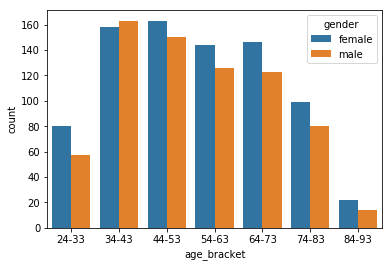

In [21]:
sns.countplot(x="age_bracket",data=df,hue="gender")

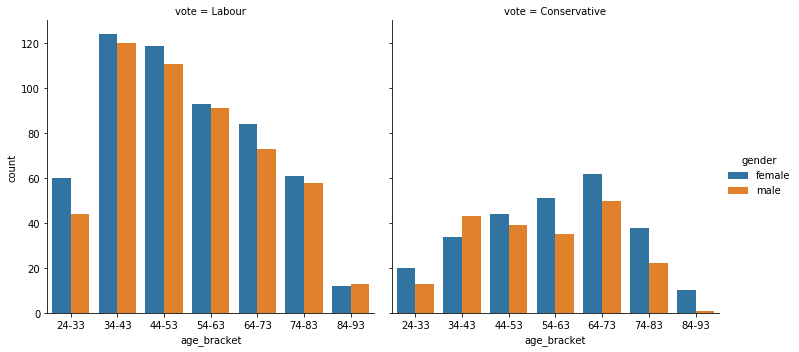

In [22]:
sns.catplot(x="age_bracket",col="vote",data=df,hue="gender",kind="count")

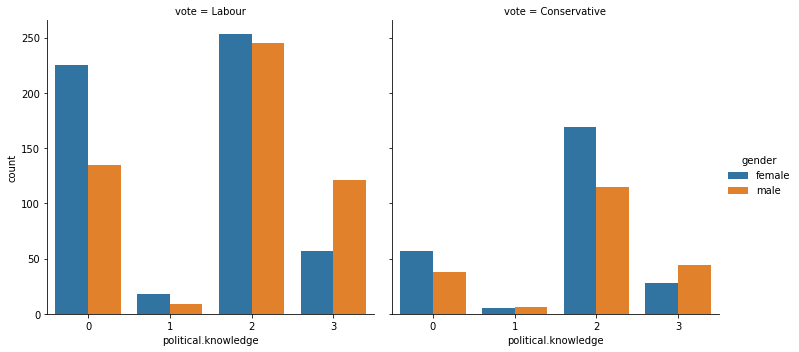

In [23]:
sns.catplot(x="political.knowledge",col="vote",data=df,hue="gender",kind="count")

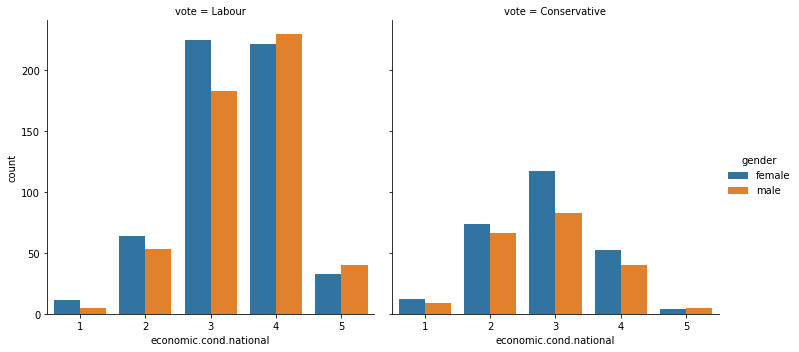

In [24]:
sns.catplot(x="economic.cond.national",col="vote",data=df,hue="gender",kind="count")

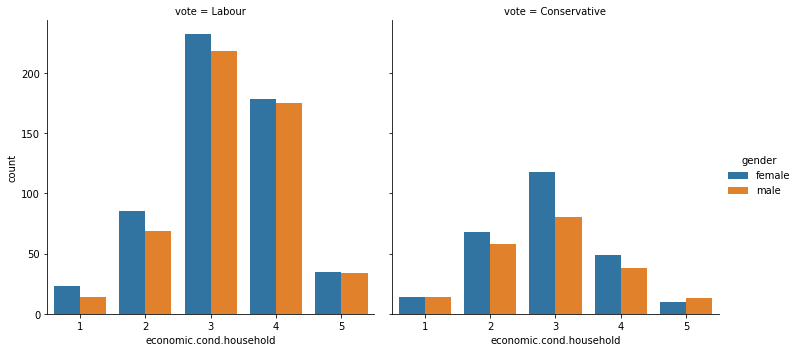

In [25]:
sns.catplot(x="economic.cond.household",col="vote",data=df,hue="gender",kind="count")

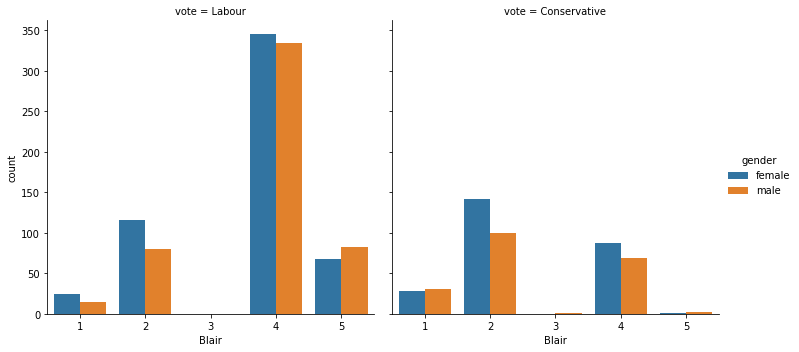

In [26]:
sns.catplot(x="Blair",col="vote",data=df,hue="gender",kind="count")

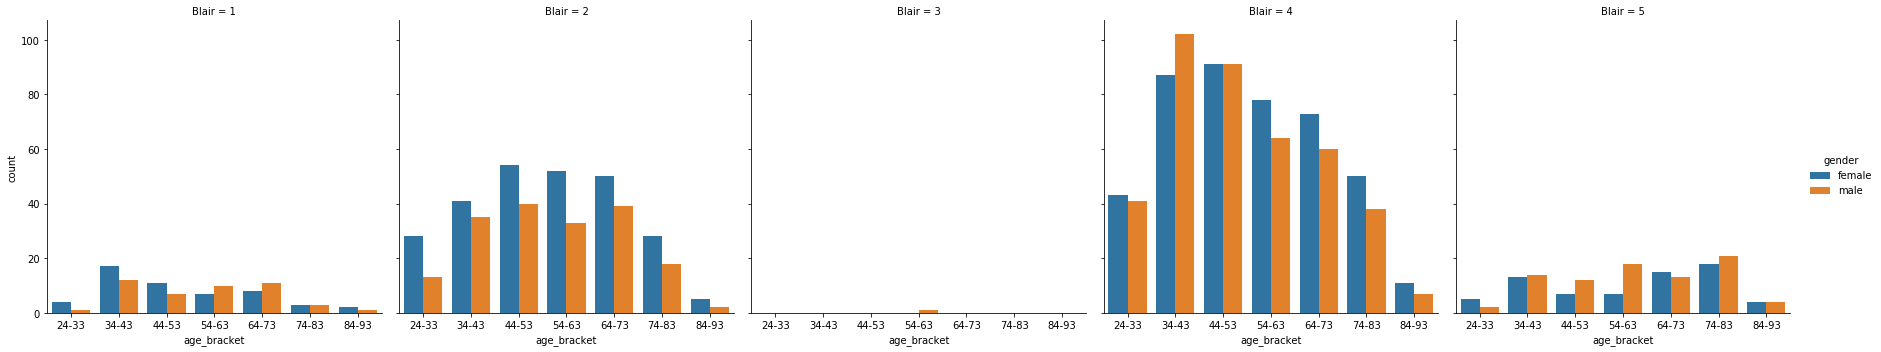

In [27]:
sns.catplot(x="age_bracket",col="Blair",data=df,hue="gender",kind="count")

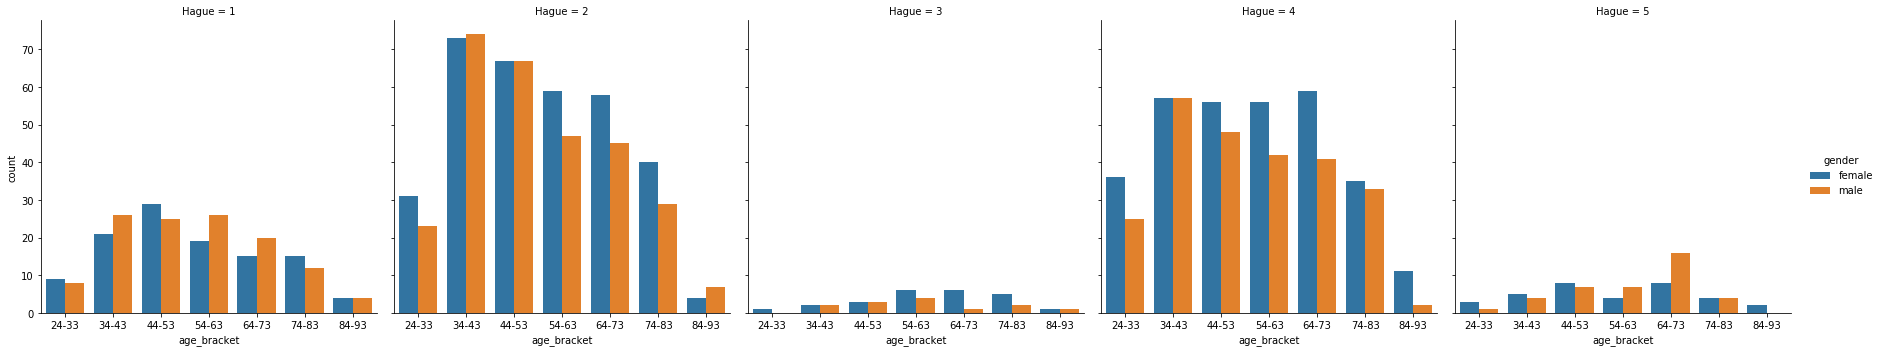

In [28]:
sns.catplot(x="age_bracket",col="Hague",data=df,hue="gender",kind="count")

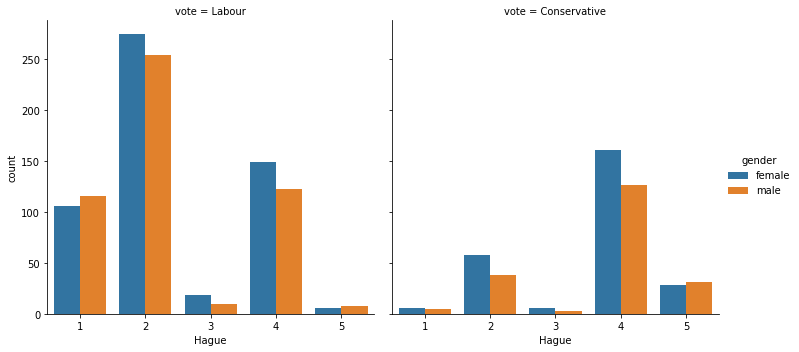

In [29]:
sns.catplot(x="Hague",col="vote",data=df,hue="gender",kind="count")

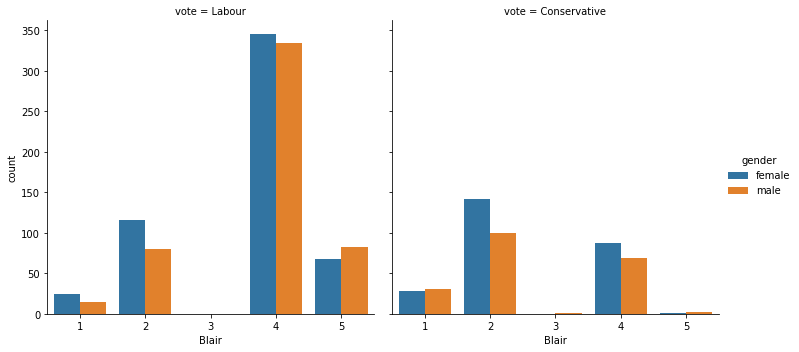

In [30]:
sns.catplot(x="Blair",col="vote",data=df,hue="gender",kind="count")

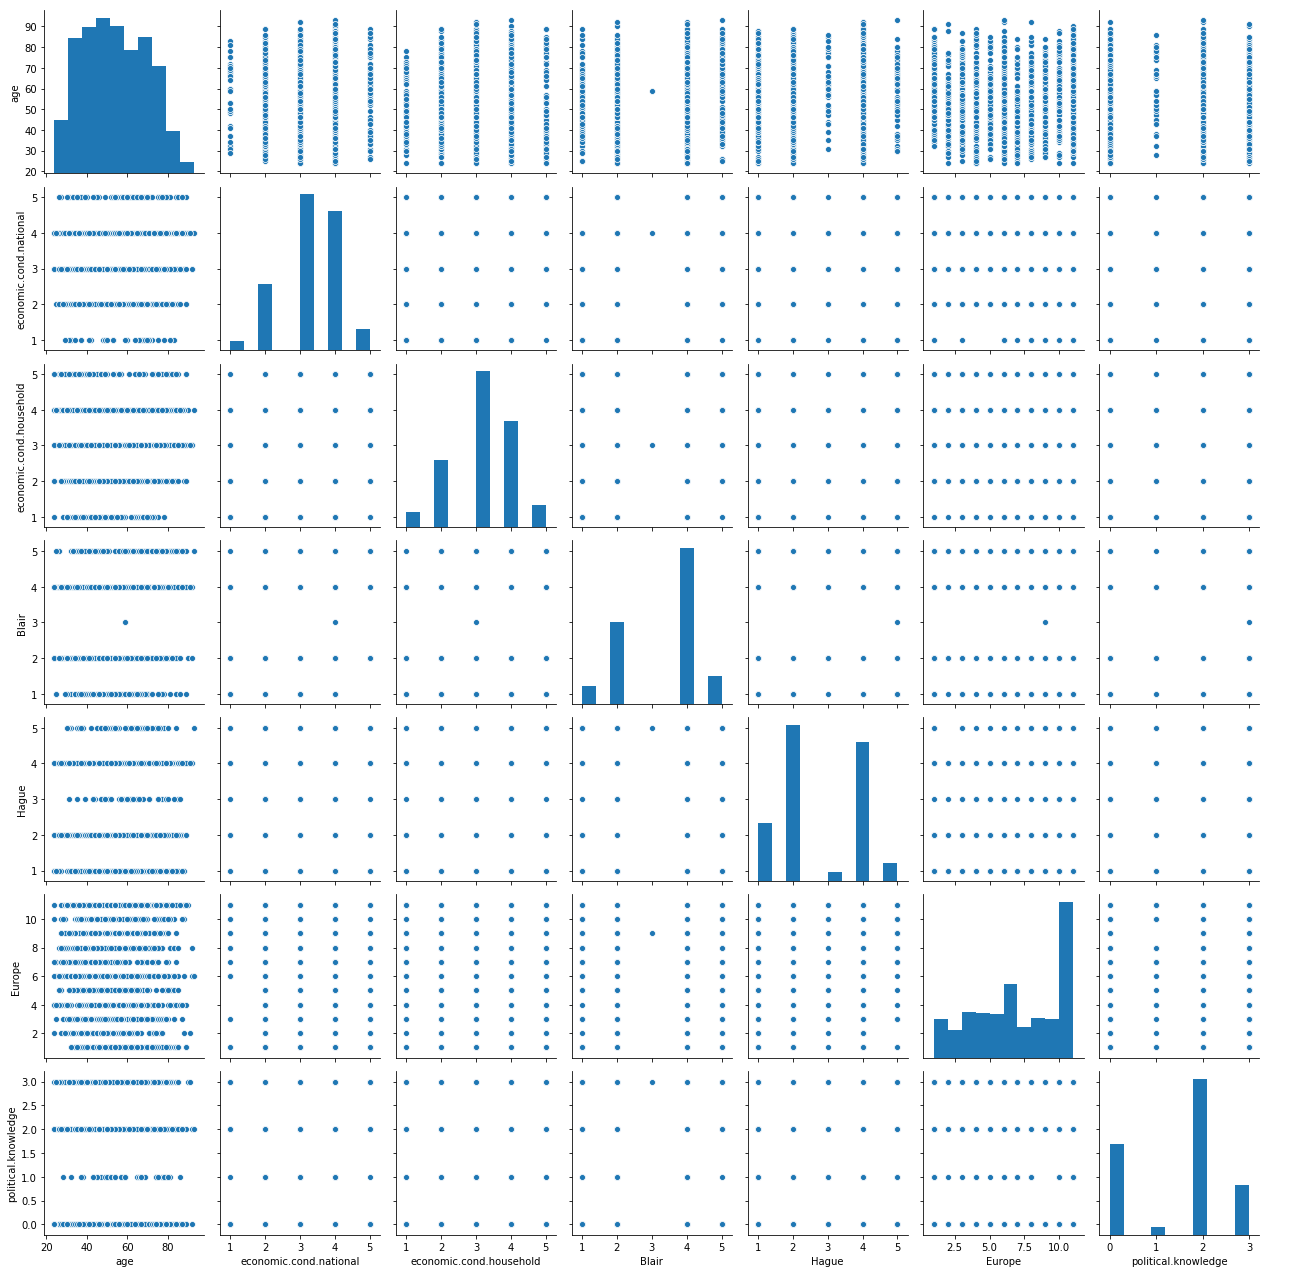

In [31]:
sns.pairplot(data=df)

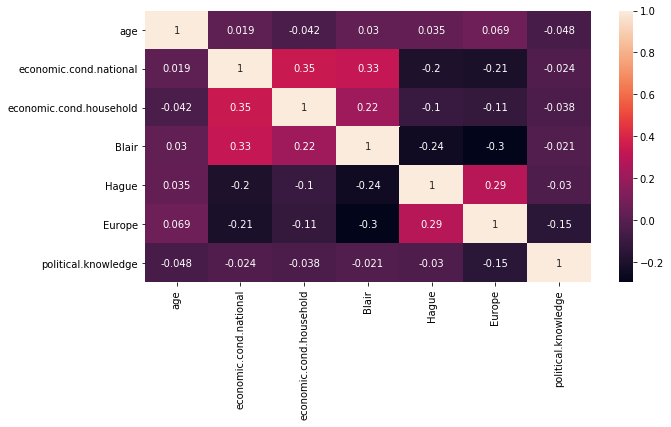

In [32]:
f,ax = plt.subplots(figsize =(10,5)) 
sns.heatmap(df.corr(), ax=ax,annot=True)

In [33]:
df.groupby(["vote","gender","age_bracket"]).agg('count')

age  economic.cond.national  \
vote         gender age_bracket                                
Conservative female 24-33         20                      20   
                    34-43         34                      34   
                    44-53         44                      44   
                    54-63         51                      51   
                    64-73         62                      62   
                    74-83         38                      38   
                    84-93         10                      10   
             male   24-33         13                      13   
                    34-43         43                      43   
                    44-53         39                      39   
                    54-63         35                      35   
                    64-73         50                      50   
                    74-83         22                      22   
                    84-93          1                       1   
Labour       female 24-33         60                      60   
                    34-43        124                     124   
                    44-53        119                     119   
                    54-63         93                      93   
                    64-73         84                      84   
                    74-83         61                      61   
                    84-93         12                      12   
             male   24-33         44                      44   
                    34-43        120                     120   
                    44-53        111                     111   
                    54-63         91                      91   
                    64-73         73                      73   
                    74-83         58                      58   
                    84-93         13                      13   

                                 economic.cond.household  Blair  Hague  \
vote         gender age_bracket                                          
Conservative female 24-33                             20     20     20   
                    34-43                             34     34     34   
                    44-53                             44     44     44   
                    54-63                             51     51     51   
                    64-73                             62     62     62   
                    74-83                             38     38     38   
                    84-93                             10     10     10   
             male   24-33                             13     13     13   
                    34-43                             43     43     43   
                    44-53                             39     39     39   
                    54-63                             35     35     35   
                    64-73                             50     50     50   
                    74-83                             22     22     22   
                    84-93                              1      1      1   
Labour       female 24-33                             60     60     60   
                    34-43                            124    124    124   
                    44-53                            119    119    119   
                    54-63                             93     93     93   
                    64-73                             84     84     84   
                    74-83                             61     61     61   
                    84-93                             12     12     12   
             male   24-33                             44     44     44   
                    34-43                            120    120    120   
                    44-53                            111    111    111   
                    54-63                             91     91     91   
                    64-73                             73     73     73   
                    74-83               

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   object  
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   int64   
 3   economic.cond.household  1525 non-null   int64   
 4   Blair                    1525 non-null   int64   
 5   Hague                    1525 non-null   int64   
 6   Europe                   1525 non-null   int64   
 7   political.knowledge      1525 non-null   int64   
 8   gender                   1525 non-null   object  
 9   age_bracket              1525 non-null   category
dtypes: category(1), int64(7), object(2)
memory usage: 109.2+ KB


#### Data Preparation: 5 marks

1. Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (5 Marks)



In [35]:
df.shape

(1525, 10)

In [36]:
df_unscaled=df

In [37]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'age_bracket']


In [38]:
for column in df[["vote","gender"]]:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

In [39]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket
0,1,43,3,3,4,1,2,2,0,34-43
1,1,36,4,4,4,4,5,2,1,34-43
2,1,35,4,4,5,2,3,2,1,34-43
3,1,24,4,2,2,1,4,0,0,24-33
4,1,41,2,2,1,1,6,2,1,34-43


In [40]:
num1=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge'] ### removing the correlated variable which was dropped earlier


In [41]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [42]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,34-43
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,34-43
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,34-43
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,24-33
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,34-43


In [43]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,34-43
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,34-43
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,34-43
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,24-33
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,34-43


In [44]:
# Copy all the predictor variables into X dataframe
X = df.drop((['vote','age_bracket']), axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

#### Modelling: 26 marks


1. Apply Logistic Regression and LDA (linear discriminant analysis). (5 marks)


## Log Model

In [46]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
## Train data
ytrain_predict_log = log_model.predict(X_train)
log_train_acc=log_model.score(X_train, y_train)
print(log_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_log))
print(metrics.classification_report(y_train, ytrain_predict_log))

0.837863167760075
[[226 106]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [48]:
## Test data
ytest_predict_log = log_model.predict(X_test)
log_test_acc = log_model.score(X_test, y_test)
print(log_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_log))
print(metrics.classification_report(y_test, ytest_predict_log))

0.8209606986899564
[[ 84  46]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [49]:
ytest_predict_prob=log_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915052,0.084948
1,0.670164,0.329836
2,0.333236,0.666764
3,0.469974,0.530026
4,0.176881,0.823119


AUC: 0.890


Text(0, 0.5, 'True Positive Rate')

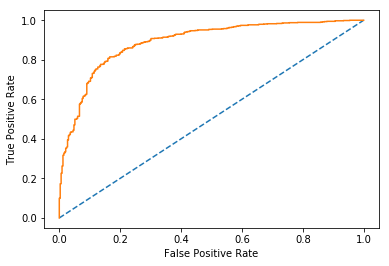

In [50]:
# predict probabilities
probs = log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.883


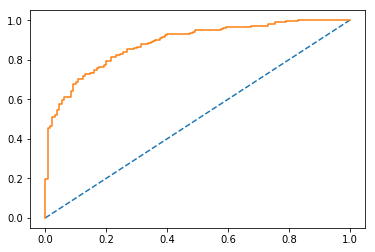

In [51]:
# predict probabilities
probs = log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr)

In [52]:
log_train_metrics=classification_report(y_train, ytrain_predict_log,output_dict=True)
df_train_log=pd.DataFrame(log_train_metrics).transpose()
log_train_recall=round(df_train_log.loc["1"][1],2)
log_train_f1=round(df_train_log.loc["1"][2],2)
log_train_precision=round(df_train_log.loc["1"][0],2)
log_test_metrics=classification_report(y_test, ytest_predict_log,output_dict=True)
df_test_log=pd.DataFrame(log_test_metrics).transpose()
log_test_recall=round(df_test_log.loc["1"][1],2)
log_test_f1=round(df_test_log.loc["1"][2],2)
log_test_precision=round(df_test_log.loc["1"][0],2)
print ('log_test_precision ',log_test_precision)
print ('log_test_recall ',log_test_recall)
print ('log_test_f1 ',log_test_f1)
print ('log_train_precision',log_train_precision)
print ('log_train_recall',log_train_recall)
print ('log_train_f1',log_train_f1)

log_test_precision  0.86
log_test_recall  0.89
log_test_f1  0.88
log_train_precision 0.86
log_train_recall 0.91
log_train_f1 0.89


## LDA

In [53]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X,y)
lda_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [54]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,34-43
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,34-43
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,34-43
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,24-33
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,34-43


In [55]:
pred_class = lda_model.predict(X)
df['Prediction'] = pred_class 
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket,Prediction
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,34-43,1
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,34-43,1
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,34-43,1
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,24-33,1
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,34-43,1


In [56]:
lda_acc=lda_model.score(X, y)
print(lda_acc)
print(metrics.confusion_matrix(y, pred_class))
print(metrics.classification_report(y, pred_class))

0.8340983606557377
[[315 147]
 [106 957]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       462
           1       0.87      0.90      0.88      1063

    accuracy                           0.83      1525
   macro avg       0.81      0.79      0.80      1525
weighted avg       0.83      0.83      0.83      1525



In [57]:
lda_metrics=classification_report(y, pred_class,output_dict=True)
df_lda=pd.DataFrame(lda_metrics).transpose()
lda_recall=round(df_lda.loc["1"][1],2)
lda_f1=round(df_lda.loc["1"][2],2)
lda_precision=round(df_lda.loc["1"][0],2)
print ('lda_precision ',lda_precision)
print ('lda_recall ',lda_recall)
print ('lda_f1 ',lda_f1)

lda_precision  0.87
lda_recall  0.9
lda_f1  0.88


AUC: 0.889


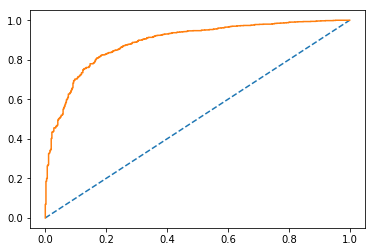

In [60]:
# predict probabilities
probs = lda_model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_auc = roc_auc_score(y, probs)
print('AUC: %.3f' % lda_auc)
# calculate roc curve
lda_fpr, lda_tpr, lda_test_thresholds = roc_curve(y, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr)

2. Apply KNN Model, Naïve Bayes Model and support vector machine (SVM) model. Interpret the results. (7 marks)


## KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
## Train data
ytrain_predict_knn = KNN_model.predict(X_train)
knn_train_acc = KNN_model.score(X_train, y_train)
print(knn_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))
print(metrics.classification_report(y_train, ytrain_predict_knn))

0.8650421743205249
[[251  81]
 [ 63 672]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       332
           1       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [63]:
ytest_predict_knn = KNN_model.predict(X_test)
knn_test_acc = KNN_model.score(X_test, y_test)
print(knn_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_knn))
print(metrics.classification_report(y_test, ytest_predict_knn))

0.8253275109170306
[[ 95  35]
 [ 45 283]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       130
           1       0.89      0.86      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



In [64]:
knn_train_metrics=classification_report(y_train, ytrain_predict_knn,output_dict=True)
df_train_knn=pd.DataFrame(knn_train_metrics).transpose()
knn_train_recall=round(df_train_knn.loc["1"][1],2)
knn_train_f1=round(df_train_knn.loc["1"][2],2)
knn_train_precision=round(df_train_knn.loc["1"][0],2)
knn_test_metrics=classification_report(y_test, ytest_predict_knn,output_dict=True)
df_test_knn=pd.DataFrame(knn_test_metrics).transpose()
knn_test_recall=round(df_test_knn.loc["1"][1],2)
knn_test_f1=round(df_test_knn.loc["1"][2],2)
knn_test_precision=round(df_test_knn.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)
print ('knn_train_precision',knn_train_precision)
print ('knn_train_recall',knn_train_recall)
print ('knn_train_f1',knn_train_f1)

knn_test_precision  0.89
knn_test_recall  0.86
knn_test_f1  0.88
knn_train_precision 0.89
knn_train_recall 0.91
knn_train_f1 0.9


AUC: 0.935


Text(0, 0.5, 'True Positive Rate')

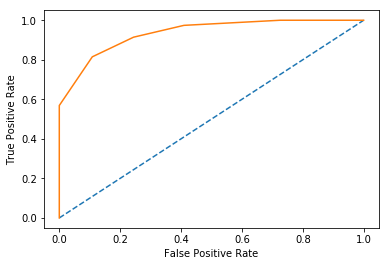

In [160]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.865


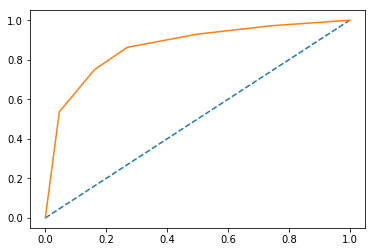

In [161]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr)

## Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [66]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
ytrain_predict_nb = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, y_train)
print(NB_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_nb))
print(metrics.classification_report(y_train, ytrain_predict_nb))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [68]:
y_test.value_counts()

1    328
0    130
Name: vote, dtype: int64

In [69]:
ytest_predict_nb = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, y_test)
print(NB_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_nb))
print(metrics.classification_report(y_test, ytest_predict_nb))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [70]:
nb_train_metrics=classification_report(y_train, ytrain_predict_nb,output_dict=True)
df_train_nb=pd.DataFrame(nb_train_metrics).transpose()
nb_train_recall=round(df_train_nb.loc["1"][1],2)
nb_train_f1=round(df_train_nb.loc["1"][2],2)
nb_train_precision=round(df_train_nb.loc["1"][0],2)
nb_test_metrics=classification_report(y_test, ytest_predict_nb,output_dict=True)
df_test_nb=pd.DataFrame(nb_test_metrics).transpose()
nb_test_recall=round(df_test_nb.loc["1"][1],2)
nb_test_f1=round(df_test_nb.loc["1"][2],2)
nb_test_precision=round(df_test_nb.loc["1"][0],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)
print ('nb_train_precision',nb_train_precision)
print ('nb_train_recall',nb_train_recall)
print ('nb_train_f1',nb_train_f1)

nb_test_precision  0.89
nb_test_recall  0.87
nb_test_f1  0.88
nb_train_precision 0.88
nb_train_recall 0.88
nb_train_f1 0.88


AUC: 0.886


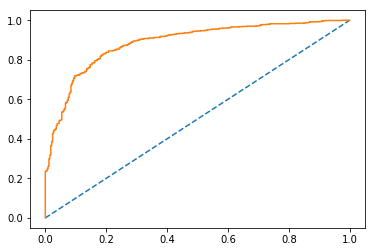

In [163]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)

AUC: 0.885


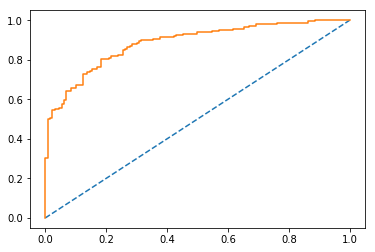

In [162]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)

## SVM

In [71]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [72]:
ytrain_predict_svm = SVM_model.predict(X_train)
svm_train_acc = SVM_model.score(X_train, y_train)
print(svm_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_svm))
print(metrics.classification_report(y_train, ytrain_predict_svm))

0.8603561387066542
[[236  96]
 [ 53 682]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       332
           1       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [73]:
ytest_predict_svm = SVM_model.predict(X_test)
svm_test_acc = SVM_model.score(X_test, y_test)
print(svm_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_svm))
print(metrics.classification_report(y_test, ytest_predict_svm))

0.8231441048034934
[[ 83  47]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       130
           1       0.86      0.90      0.88       328

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [74]:
svm_train_metrics=classification_report(y_train, ytrain_predict_svm,output_dict=True)
df_train_svm=pd.DataFrame(svm_train_metrics).transpose()
svm_train_recall=round(df_train_svm.loc["1"][1],2)
svm_train_f1=round(df_train_svm.loc["1"][2],2)
svm_train_precision=round(df_train_svm.loc["1"][0],2)
svm_test_metrics=classification_report(y_test, ytest_predict_svm,output_dict=True)
df_test_svm=pd.DataFrame(svm_test_metrics).transpose()
svm_test_recall=round(df_test_svm.loc["1"][1],2)
svm_test_f1=round(df_test_svm.loc["1"][2],2)
svm_test_precision=round(df_test_svm.loc["1"][0],2)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)
print ('svm_train_precision',svm_train_precision)
print ('svm_train_recall',svm_train_recall)
print ('svm_train_f1',svm_train_f1)

svm_test_precision  0.86
svm_test_recall  0.9
svm_test_f1  0.88
svm_train_precision 0.88
svm_train_recall 0.93
svm_train_f1 0.9


AUC: 0.914


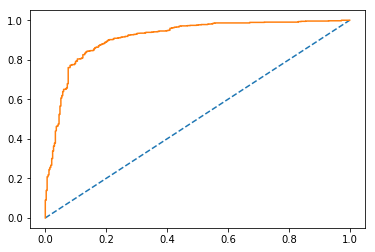

In [166]:
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % SVM_train_auc)
# calculate roc curve
SVM_train_fpr, SVM_train_tpr, SVM_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_train_fpr, SVM_train_tpr)

AUC: 0.898


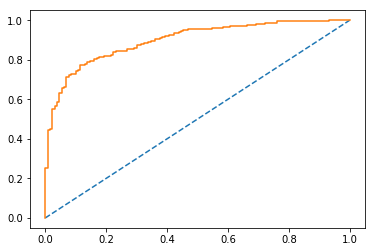

In [165]:
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
SVM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % SVM_test_auc)
# calculate roc curve
SVM_test_fpr, SVM_test_tpr, SVM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(SVM_test_fpr, SVM_test_tpr)

3. Model Tuning, Bagging (Random Forest should be applied for Bagging) and Boosting. (7 marks)
        

## Model Tuning - Grid Search

#### Log


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {
    'C': [1,1.4,2,3,4,5],
    'intercept_scaling': [1,0,0.1],
    'max_iter': [120,50,60,70,80,100],
    'tol': [0.0001,0.001,1]
}

lgcl = LogisticRegression(random_state=0)

grid_search_log = GridSearchCV(estimator = lgcl, param_grid = param_grid, cv = 5)

In [82]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1.4, 2, 3, 4, 5],
                         'intercept_scaling': [1, 0, 0.1],
                         'max_iter': [120, 50, 60, 70, 80, 100],
                         'tol': [0.0001, 0.001, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
grid_search_log.best_params_

{'C': 2, 'intercept_scaling': 1, 'max_iter': 120, 'tol': 1}

In [84]:
best_grid_log = grid_search_log.best_estimator_

In [85]:
best_grid_log

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=1, verbose=0,
                   warm_start=False)

## Predicting the Training and Testing data

In [86]:
ytrain_predict_log_tuned = best_grid_log.predict(X_train)
ytest_predict_log_tuned = best_grid_log.predict(X_test)

### Log Model Performance Evaluation on Training data


In [87]:
log_tune_train_acc=best_grid_log.score(X_train,y_train) 
print(log_tune_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_log_tuned))
print(metrics.classification_report(y_train, ytrain_predict_log_tuned))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [88]:
log_tune_test_acc=best_grid_log.score(X_test,y_test) 
print(log_tune_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_log_tuned))
print(metrics.classification_report(y_test, ytest_predict_log_tuned))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


Text(0, 0.5, 'True Positive Rate')

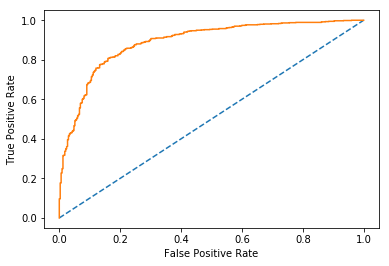

In [89]:
# predict probabilities
probs = best_grid_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)
# calculate roc curve
log_train_fpr, log_train_tpr, log_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.883


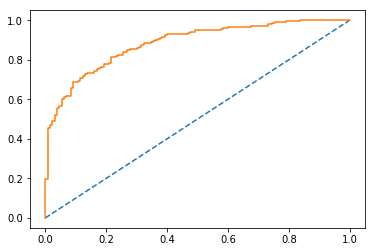

In [90]:
# predict probabilities
probs = best_grid_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)
# calculate roc curve
log_test_fpr, log_test_tpr, log_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr)

In [91]:
log_tuned_train_metrics=classification_report(y_train, ytrain_predict_log_tuned,output_dict=True)
df_train_log_tuned=pd.DataFrame(log_tuned_train_metrics).transpose()
log_tuned_train_recall=round(df_train_log_tuned.loc["1"][1],2)
log_tuned_train_f1=round(df_train_log_tuned.loc["1"][2],2)
log_tuned_train_precision=round(df_train_log_tuned.loc["1"][0],2)
log_tuned_test_metrics=classification_report(y_test, ytest_predict_log_tuned,output_dict=True)
df_test_log_tuned=pd.DataFrame(log_tuned_test_metrics).transpose()
log_tuned_test_recall=round(df_test_log_tuned.loc["1"][1],2)
log_tuned_test_f1=round(df_test_log_tuned.loc["1"][2],2)
log_tuned_test_precision=round(df_test_log_tuned.loc["1"][0],2)
print ('log_tuned_test_precision ',log_tuned_test_precision)
print ('log_tuned_test_recall ',log_tuned_test_recall)
print ('log_tuned_test_f1 ',log_tuned_test_f1)
print ('log_tuned_train_precision',log_tuned_train_precision)
print ('log_tuned_train_recall',log_tuned_train_recall)
print ('log_tuned_train_f1',log_tuned_train_f1)

log_tuned_test_precision  0.87
log_tuned_test_recall  0.89
log_tuned_test_f1  0.88
log_tuned_train_precision 0.87
log_tuned_train_recall 0.91
log_tuned_train_f1 0.89


## LDA

In [92]:
lda_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [93]:
param_grid_lda = {
    'solver':['lsqr','eigen','svd'],
    'tol': [0.001,0.0001,0.1]
}

lda = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(estimator = lda, param_grid = param_grid_lda, cv = 5)

In [94]:
grid_search_lda.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['lsqr', 'eigen', 'svd'],
                         'tol': [0.001, 0.0001, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
grid_search_lda.best_params_

{'solver': 'svd', 'tol': 0.001}

In [96]:
best_grid_lda = grid_search_lda.best_estimator_

In [97]:
best_grid_lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.001)

In [98]:
pred_class_tuned = lda_model.predict(X)
df['Prediction_tuned'] = pred_class_tuned
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bracket,Prediction,Prediction_tuned
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0,34-43,1,1
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1,34-43,1,1
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1,34-43,1,1
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0,24-33,1,1
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1,34-43,1,1


In [99]:
lda_tuned_acc=best_grid_lda.score(X, y)
print(lda_tuned_acc)
print(metrics.confusion_matrix(y, pred_class_tuned))
print(metrics.classification_report(y, pred_class_tuned))

0.8340983606557377
[[315 147]
 [106 957]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       462
           1       0.87      0.90      0.88      1063

    accuracy                           0.83      1525
   macro avg       0.81      0.79      0.80      1525
weighted avg       0.83      0.83      0.83      1525



AUC: 0.889


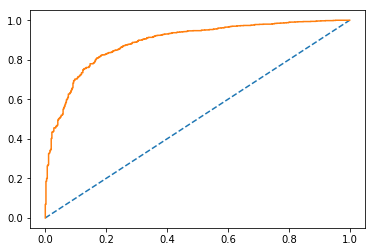

In [103]:
# predict probabilities
probs_lda = best_grid_lda.predict_proba(X)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC
lda_auc = roc_auc_score(y, probs_lda)
print('AUC: %.3f' % lda_auc)
# calculate roc curve
lda_fpr, lda_tpr, lda_test_thresholds = roc_curve(y, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr)

## KNN


In [104]:
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
param_grid_knn = {
    'leaf_size': [50,60,100],
    'n_neighbors': [11,13,15],
    'p': [5,1,2,3,4],
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, cv = 5)

In [106]:
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [50, 60, 100],
                         'n_neighbors': [11, 13, 15], 'p': [5, 1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [107]:
grid_search_knn.best_params_

{'leaf_size': 50, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [108]:
best_grid_knn = grid_search_knn.best_estimator_

In [109]:
best_grid_knn

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=1,
                     weights='uniform')

In [110]:
ytrain_predict_knn_tuned = best_grid_knn.predict(X_train)
ytest_predict_knn_tuned = best_grid_knn.predict(X_test)

In [111]:
knn_tune_train_acc=best_grid_knn.score(X_train,y_train) 
print(knn_tune_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_knn_tuned))
print(metrics.classification_report(y_train, ytrain_predict_knn_tuned))

0.845360824742268
[[232 100]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.81      1067
weighted avg       0.84      0.85      0.84      1067



In [175]:
knn_tune_test_acc=best_grid_knn.score(X_test,y_test) 
print(knn_tune_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_knn_tuned))
print(metrics.classification_report(y_test, ytest_predict_knn_tuned))

0.8296943231441049
[[ 92  38]
 [ 40 288]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.909


Text(0, 0.5, 'True Positive Rate')

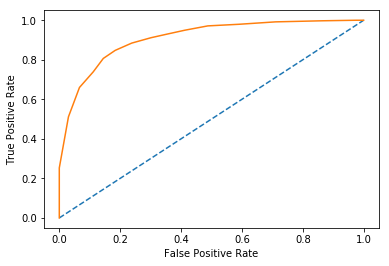

In [176]:
# predict probabilities
probs = best_grid_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.889


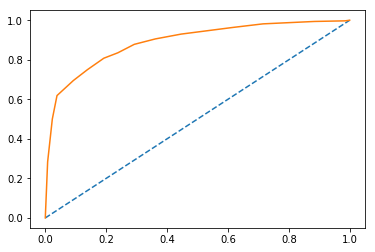

In [167]:
# predict probabilities
probs = best_grid_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

## Naive Bayes

In [115]:
NB_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
## No hyper parameter to tune, therefor no grid search

In [117]:
ytrain_predict_nb = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, y_train)
print(NB_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_nb))
print(metrics.classification_report(y_train, ytrain_predict_nb))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [118]:
ytest_predict_nb = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, y_test)
print(NB_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_nb))
print(metrics.classification_report(y_test, ytest_predict_nb))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.886


Text(0, 0.5, 'True Positive Rate')

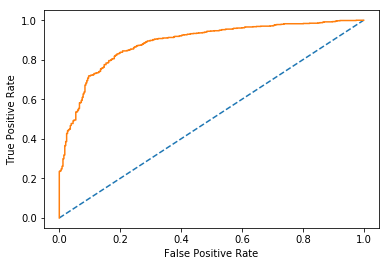

In [119]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.885


Text(0, 0.5, 'True Positive Rate')

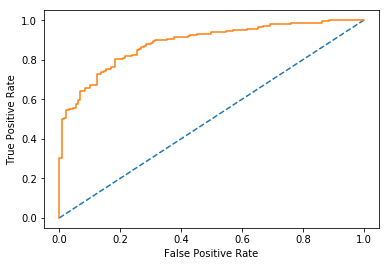

In [120]:
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## SVM

In [121]:
SVM_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [122]:
param_grid_svm = {
    'C': [0.1,1,10,100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm=svm.SVC(probability=True, random_state=1)

grid_search_svm = GridSearchCV(estimator = svm, param_grid = param_grid_svm, cv = 5)

In [123]:
grid_search_svm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [124]:
grid_search_svm.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [125]:
best_grid_svm = grid_search_svm.best_estimator_

In [126]:
best_grid_svm

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [127]:
ytrain_predict_svm_tuned = best_grid_svm.predict(X_train)
ytest_predict_svm_tuned = best_grid_svm.predict(X_test)

In [128]:
svm_tune_train_acc=best_grid_svm.score(X_train,y_train) 
print(svm_tune_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_svm_tuned))
print(metrics.classification_report(y_train, ytrain_predict_svm_tuned))

0.8434864104967198
[[232 100]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [129]:
svm_tune_test_acc=best_grid_svm.score(X_test,y_test) 
print(svm_tune_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_svm_tuned))
print(metrics.classification_report(y_test, ytest_predict_svm_tuned))

0.8187772925764192
[[ 85  45]
 [ 38 290]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.905


Text(0, 0.5, 'True Positive Rate')

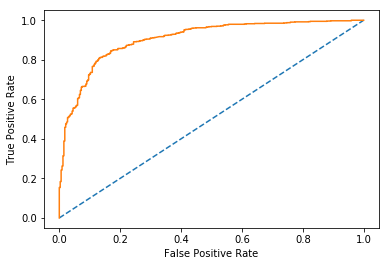

In [130]:
# predict probabilities
probs = best_grid_svm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_train_auc)
# calculate roc curve
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

AUC: 0.895


Text(0, 0.5, 'True Positive Rate')

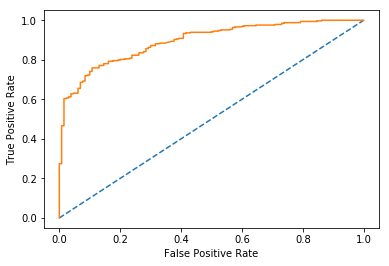

In [131]:
# predict probabilities
probs = best_grid_svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Bagging -  Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [133]:
## Performance matrix on train data set
ytrain_predict_rf = RF_model.predict(X_train)
RF_train_acc =RF_model.score(X_train, y_train)
print(RF_train_acc)
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))
print(metrics.classification_report(y_train, ytrain_predict_rf))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [134]:
## Performance Matrix on test data set
ytest_predict_rf = RF_model.predict(X_test)
RF_test_acc = RF_model.score(X_test, y_test)
print(RF_test_acc)
print(metrics.confusion_matrix(y_test, ytest_predict_rf))
print(metrics.classification_report(y_test, ytest_predict_rf))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [135]:
rf_train_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df_train_rf=pd.DataFrame(rf_train_metrics).transpose()
rf_train_recall=round(df_train_rf.loc["1"][1],2)
rf_train_f1=round(df_train_rf.loc["1"][2],2)
rf_train_precision=round(df_train_rf.loc["1"][0],2)
rf_test_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df_test_rf=pd.DataFrame(rf_test_metrics).transpose()
rf_test_recall=round(df_test_rf.loc["1"][1],2)
rf_test_f1=round(df_test_rf.loc["1"][2],2)
rf_test_precision=round(df_test_rf.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)
print ('rf_train_precision',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_test_precision  0.88
rf_test_recall  0.87
rf_test_f1  0.87
rf_train_precision 1.0
rf_train_recall 1.0
rf_train_f1 1.0


AUC: 1.000


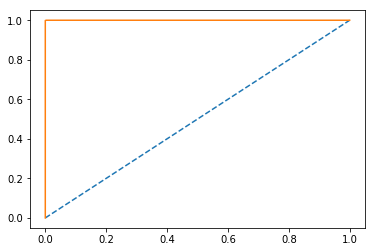

In [172]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RF_train_auc)
# calculate roc curve
RF_train_fpr, RF_train_tpr, RF_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_train_fpr, RF_train_tpr)

AUC: 0.888


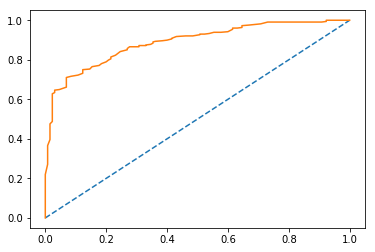

In [168]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
RF_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RF_test_auc)
# calculate roc curve
RF_test_fpr, RF_test_tpr, RF_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(RF_test_fpr, RF_test_tpr)

## Boosting

In [136]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [137]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(X_train)
model_score = XGB_SM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8294283036551078
[[197 135]
 [ 47 688]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       332
           1       0.84      0.94      0.88       735

    accuracy                           0.83      1067
   macro avg       0.82      0.76      0.78      1067
weighted avg       0.83      0.83      0.82      1067



In [138]:
y_test_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8100436681222707
[[ 71  59]
 [ 28 300]]
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       130
           1       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.78      0.73      0.75       458
weighted avg       0.80      0.81      0.80       458



4. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

AUC: 0.899


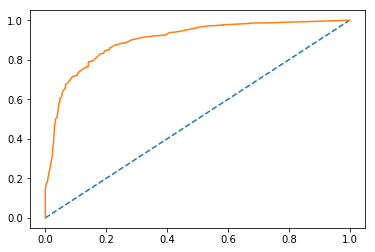

In [173]:
# predict probabilities
probs = XGB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_SM_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % XGB_SM_train_auc)
# calculate roc curve
XGB_SM_train_fpr, XGB_SM_train_tpr, XGB_SM_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_SM_train_fpr, XGB_SM_train_tpr)

AUC: 0.892


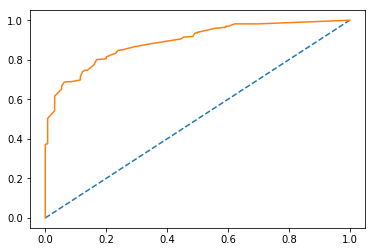

In [170]:
# predict probabilities
probs = XGB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
XGB_SM_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % XGB_SM_test_auc)
# calculate roc curve
XGB_SM_test_fpr, XGB_SM_test_tpr, XGB_SM_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(XGB_SM_test_fpr, XGB_SM_test_tpr)

#### Inference: 5 marks


1. Based on these predictions, what are the insights? (5 marks)

Refer Report

### Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1963


In [140]:
import nltk
nltk.download('inaugural')
nltk.download('punkt')
from nltk.corpus import inaugural
from nltk import punkt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import re

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/Aarushi/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Aarushi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [141]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [142]:
roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [143]:
kennedy=inaugural.raw('1961-Kennedy.txt')

In [144]:
nixon=inaugural.raw('1973-Nixon.txt')

### Find the number of characters, words and sentences for the mentioned documents. – 3 Marks


In [145]:
roosevelt_char=len(inaugural.raw(('1941-Roosevelt.txt')))
kennedy_char=len(inaugural.raw(('1961-Kennedy.txt')))
nixon_char=len(inaugural.raw(('1973-Nixon.txt')))
print('No. of charcaters: \n Roosevelt:',roosevelt_char,'\n Kennedy:',kennedy_char,'\n Nixon:',nixon_char)

No. of charcaters: 
 Roosevelt: 7571 
 Kennedy: 7618 
 Nixon: 9991


In [146]:
roosevelt_words=len(inaugural.words(('1941-Roosevelt.txt')))
kennedy_words=len(inaugural.words(('1961-Kennedy.txt')))
nixon_words=len(inaugural.words(('1973-Nixon.txt')))
print('No. of words: \n Roosevelt:',roosevelt_words,'\n Kennedy:',kennedy_words,'\n Nixon:',nixon_words)

No. of words: 
 Roosevelt: 1536 
 Kennedy: 1546 
 Nixon: 2028


In [147]:
roosevelt_sentences=len(inaugural.sents(('1941-Roosevelt.txt')))
kennedy_sentences=len(inaugural.sents(('1961-Kennedy.txt')))
nixon_sentences=len(inaugural.sents(('1973-Nixon.txt')))
print('No. of sentences: \n Roosevelt:',roosevelt_sentences,'\n Kennedy:',kennedy_sentences,'\n Nixon:',nixon_sentences)

No. of sentences: 
 Roosevelt: 68 
 Kennedy: 52 
 Nixon: 69


In [148]:
print('Roosevelt: \n Charcters:', roosevelt_char,'\n Words:',roosevelt_words,'\n Sentences:',roosevelt_sentences)
print('\n')
print('Kennedy: \n Charcters:', kennedy_char,'\n Words:',kennedy_words,'\n Sentences:',kennedy_sentences)
print('\n')
print('Nixon: \n Charcters:', nixon_char,'\n Words:',nixon_words,'\n Sentences:',nixon_sentences)
print('\n')

Roosevelt: 
 Charcters: 7571 
 Words: 1536 
 Sentences: 68


Kennedy: 
 Charcters: 7618 
 Words: 1546 
 Sentences: 52


Nixon: 
 Charcters: 9991 
 Words: 2028 
 Sentences: 69




### Remove all the stopwords from all the three speeches. – 3 Marks


In [149]:
 # Remove all the special characters
roosevelt = re.sub(r'\W', ' ', roosevelt)
kennedy = re.sub(r'\W', ' ', kennedy)
nixon = re.sub(r'\W', ' ', nixon)

# remove all single characters
roosevelt= re.sub(r'\s+[a-zA-Z]\s+', ' ', roosevelt)
kennedy= re.sub(r'\s+[a-zA-Z]\s+', ' ', kennedy)
nixon= re.sub(r'\s+[a-zA-Z]\s+', ' ', nixon)

    # Remove single characters from the start
roosevelt = re.sub(r'\^[a-zA-Z]\s+', ' ', roosevelt)
kennedy = re.sub(r'\^[a-zA-Z]\s+', ' ', kennedy)
nixon = re.sub(r'\^[a-zA-Z]\s+', ' ', nixon)

    # Substituting multiple spaces with single space
roosevelt = re.sub(r'\s+', ' ', roosevelt, flags=re.I)
kennedy = re.sub(r'\s+', ' ', kennedy, flags=re.I)
nixon = re.sub(r'\s+', ' ', nixon, flags=re.I)

    # Removing prefixed 'n'
roosevelt = re.sub(r'^n\s+', '', roosevelt)
kennedy = re.sub(r'^n\s+', '', kennedy)
nixon = re.sub(r'^n\s+', '', nixon)

    # Converting to Lowercase
roosevelt = roosevelt.lower()
kennedy = kennedy.lower()
nixon = nixon.lower()

In [150]:
stop = stopwords.words('english') #initialise stop words from English language

word_tokens_r = word_tokenize(roosevelt) #Converting each word to a token
word_tokens_k = word_tokenize(kennedy)
word_tokens_n = word_tokenize(nixon)

filtered_sentence_roosevelt = [] 
filtered_sentence_kennedy = [] 
filtered_sentence_nixon = [] 
  
for x in word_tokens_r: #in each token, removing stopwords from english language
    if x not in stop: 
        filtered_sentence_roosevelt.append(x) #appending non-stopwords to filtered_sentence list

for x in word_tokens_k: 
    if x not in stop: 
        filtered_sentence_kennedy.append(x) 
        
for x in word_tokens_n: 
    if x not in stop: 
        filtered_sentence_nixon.append(x)


In [151]:
roosevelt_new = (" ").join(filtered_sentence_roosevelt) #Joining the words with a space to form sentences
kennedy_new = (" ").join(filtered_sentence_kennedy)
nixon_new = (" ").join(filtered_sentence_nixon)

### Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks


In [152]:
fdist_r = FreqDist(filtered_sentence_roosevelt)# Calculating frequency distribution of each word
fdist_k = FreqDist(filtered_sentence_kennedy)
fdist_n = FreqDist(filtered_sentence_nixon)

In [153]:
top_three_roosevelt = fdist_r.most_common(3) #Displaying 3 most used words
top_three_kennedy = fdist_k.most_common(3)
top_three_nixon = fdist_n.most_common(3)

In [154]:
print("Top 3 words in Roosevelt's address:\n",top_three_roosevelt)
print("\n")
print("Top 3 words in Kennedy's address: \n",top_three_kennedy)
print("\n")
print("Top 3 words in Nixon's address:\n",top_three_nixon)

Top 3 words in Roosevelt's address:
 [('nation', 12), ('know', 10), ('spirit', 9)]


Top 3 words in Kennedy's address: 
 [('let', 16), ('us', 12), ('world', 8)]


Top 3 words in Nixon's address:
 [('us', 26), ('let', 22), ('america', 21)]


### Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks 

In [155]:
wordcloud_r = WordCloud(collocations=False,width = 1000, height = 1000,
                        background_color ='black', min_font_size = 10).generate(roosevelt_new) 

wordcloud_k = WordCloud(collocations=False,width = 1000, height = 1000,
                        background_color ='black', min_font_size = 10).generate(kennedy_new) 

wordcloud_n = WordCloud(collocations=False,width = 1000, height = 1000,
                        background_color ='black', min_font_size = 10).generate(nixon_new) 

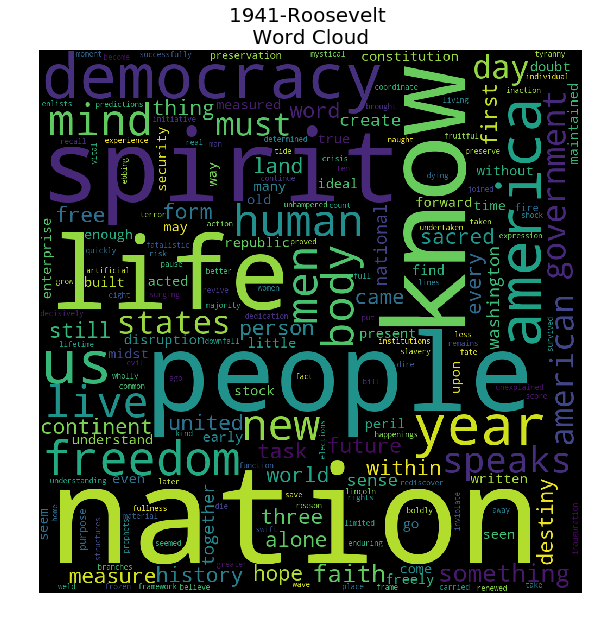

In [156]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('1941-Roosevelt \n Word Cloud ', fontdict = {'fontsize' : 20})
plt.show()

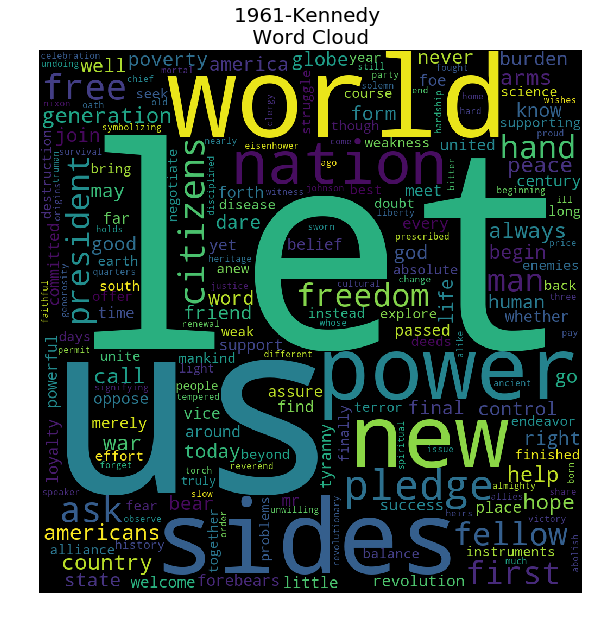

In [157]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_k) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('1961-Kennedy \n Word Cloud ', fontdict = {'fontsize' : 20})
plt.show()

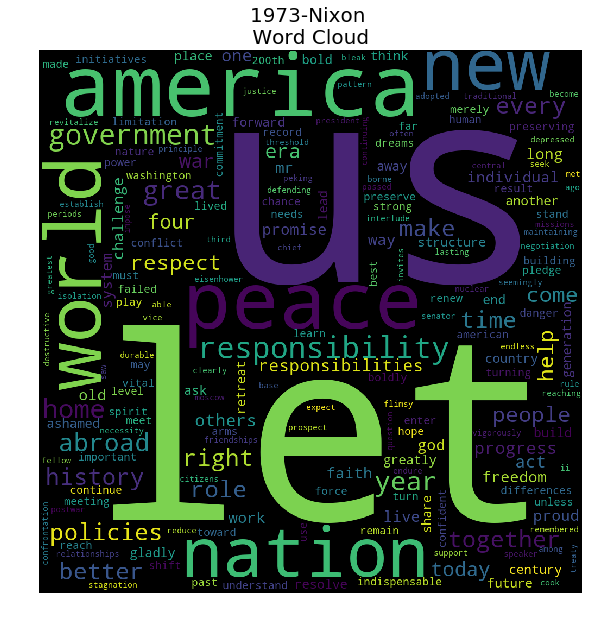

In [158]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('1973-Nixon \n Word Cloud ', fontdict = {'fontsize' : 20})
plt.show()